In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fueleco = pd.read_csv('Desktop/vehicles.csv.zip')

C:\Users\user\AppData\Local\Temp/ipykernel_21476/3076014760.py:6: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  fueleco = pd.read_csv('Desktop/vehicles.csv.zip')


In [44]:
fueleco.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [93]:
fueleco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43418 entries, 0 to 43417
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        43418 non-null  float64
 1   barrelsA08       43418 non-null  float64
 2   charge120        43418 non-null  float64
 3   charge240        43418 non-null  float64
 4   city08           43418 non-null  int64  
 5   city08U          43418 non-null  float64
 6   cityA08          43418 non-null  int64  
 7   cityA08U         43418 non-null  float64
 8   cityCD           43418 non-null  float64
 9   cityE            43418 non-null  float64
 10  cityUF           43418 non-null  float64
 11  co2              43418 non-null  int64  
 12  co2A             43418 non-null  int64  
 13  co2TailpipeAGpm  43418 non-null  float64
 14  co2TailpipeGpm   43418 non-null  float64
 15  comb08           43418 non-null  int64  
 16  comb08U          43418 non-null  float64
 17  combA08     

In [48]:
fueleco.describe(include = a'object').T

,count,unique,top,freq
drive,42232,7,Front-Wheel Drive,14776
eng_dscr,26887,562,(FFS),8827
fuelType,43418,14,Regular,27381
fuelType1,43418,6,Regular Gasoline,28828
make,43418,139,Chevrolet,4159
model,43418,4375,F150 Pickup 2WD,226
mpgData,43400,2,N,29726
trany,43407,40,Automatic 4-spd,11048
VClass,43418,34,Compact Cars,6086
guzzler,2558,3,G,1579


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


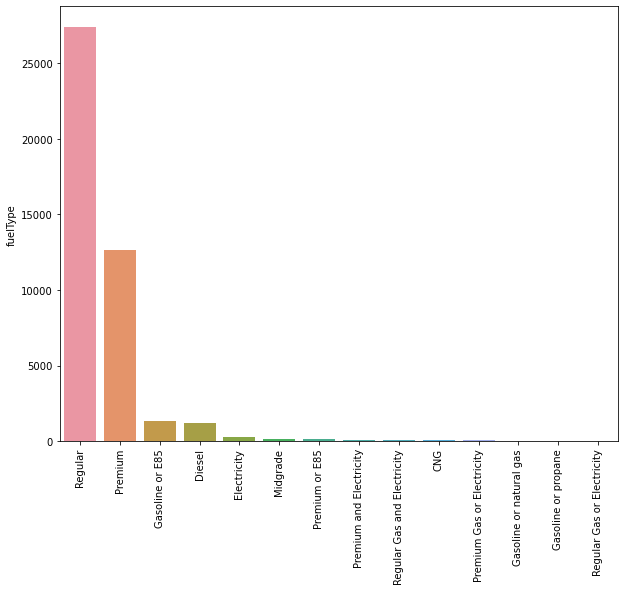

In [50]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(fueleco['fuelType'].value_counts().index, fueleco['fuelType'].value_counts())
plt.xticks(rotation = 90)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


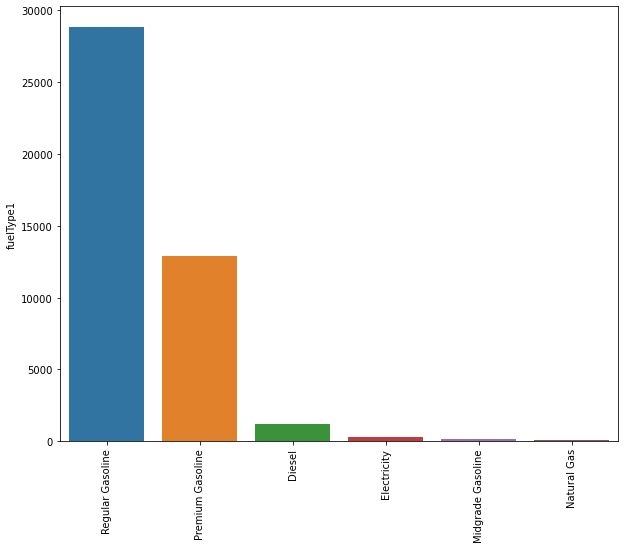

In [51]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(fueleco['fuelType1'].value_counts().index, fueleco['fuelType1'].value_counts())
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

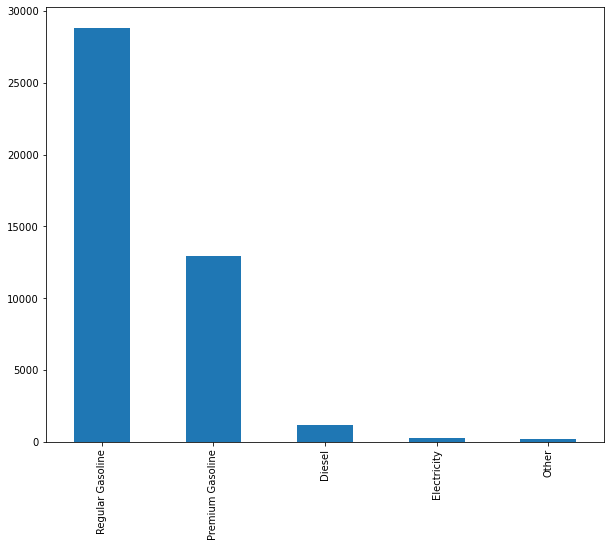

In [89]:
fig, ax = plt.subplots(figsize = (10, 8))

top_n = fueleco['fuelType1'].value_counts().index[:4]
(
    fueleco.assign(
        make = fueleco['fuelType1'].where(
            fueleco['fuelType1'].isin(top_n), 'Other'))
    .make.value_counts()[:]
    .plot.bar(ax = ax)
)


<AxesSubplot:xlabel='count', ylabel='fuelType'>

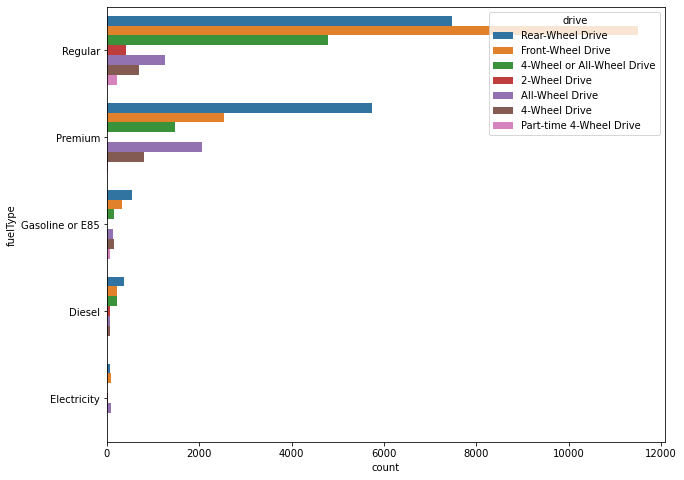

In [112]:
fig, ax = plt.subplots(figsize = (10, 8))

top_n = fueleco.fuelType.value_counts().index[:5]

sns.countplot(y = 'fuelType',
              data = fueleco[fueleco.fuelType.isin(top_n)]
              , hue = 'drive', order = fueleco.fuelType.value_counts().index[:5]
             )

<AxesSubplot:xlabel='drive', ylabel='Count'>

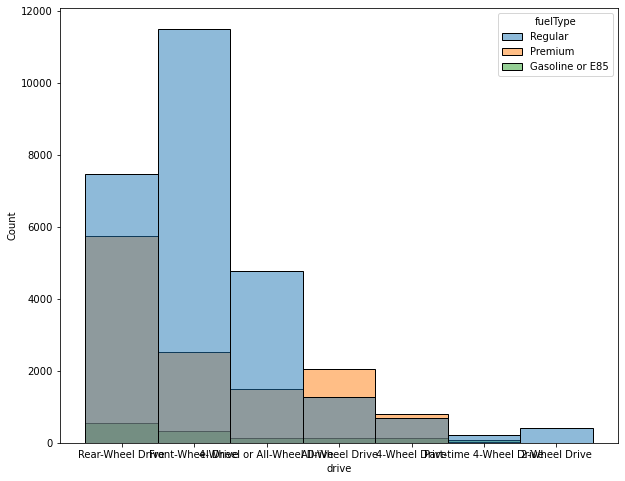

In [114]:
fig, ax = plt.subplots(figsize = (10, 8))

top_n = fueleco.fuelType.value_counts().index[:3]

sns.histplot(x = 'drive',
             data = fueleco[fueleco.fuelType.isin(top_n)], hue = 'fuelType', binwidth = 1,
             ax = ax)


In [125]:
mask = fueleco.make.isin(['Ford', 'Toyota', 'Volkswagen', 'Tesla'])
fueleco[mask].groupby('make').city08.agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
make,,,,
Ford,17.298746,7.646095,9,118
Tesla,103.648148,17.129149,80,150
Toyota,20.974874,8.161689,10,87
Volkswagen,21.972200,8.879492,11,126


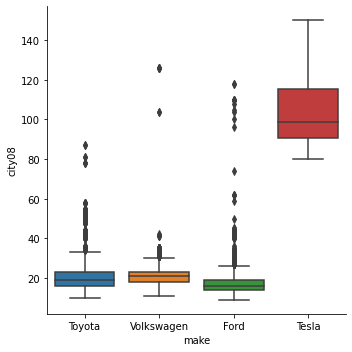

In [126]:
sns.catplot(x = 'make', y = 'city08', data = fueleco[mask], kind = 'box')

In [127]:
fueleco[mask].groupby('drive').city08.count()

drive
2-Wheel Drive                  133
4-Wheel Drive                   48
4-Wheel or All-Wheel Drive    1071
All-Wheel Drive                427
Front-Wheel Drive             2871
Part-time 4-Wheel Drive        257
Rear-Wheel Drive              2029
Name: city08, dtype: int64

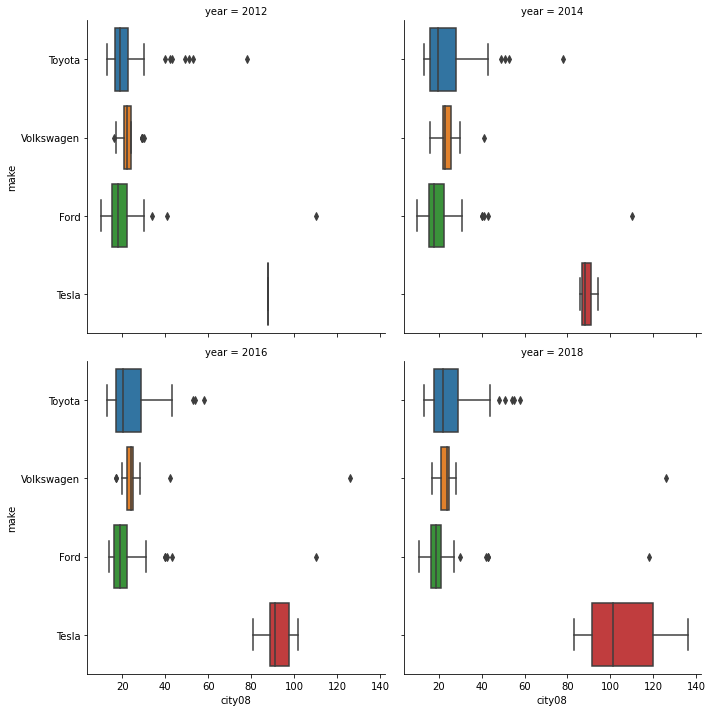

In [136]:
sns.catplot(x = 'city08', y = 'make', data = fueleco[mask], kind = 'box',
            col = 'year', col_order = [2012, 2014, 2016, 2018],
            col_wrap = 2)

<AxesSubplot:>

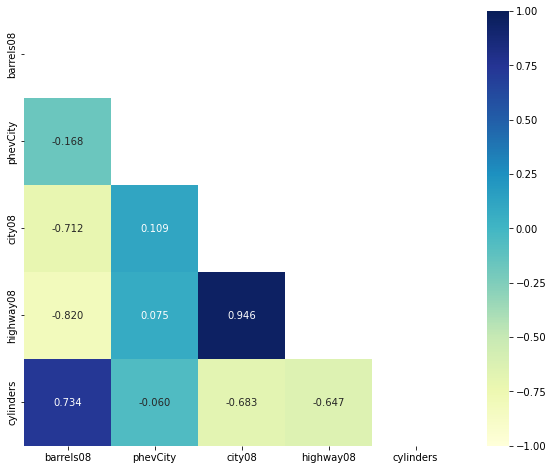

In [150]:
fig, ax = plt.subplots(figsize = (10, 8))

corr = fueleco[['barrels08', 'phevCity', 'city08', 'highway08', 'cylinders']].corr()

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            mask = mask,
            fmt = '.3f',
            annot = True,
            ax = ax,
            cmap = 'YlGnBu',
            vmin = -1,
            vmax = 1,
            square = True)